# 实验6-统计方法与分析

<table style="margin: 0 auto;"> 
    <tr> 
        <td>班级</td> <td> 24智能 </td> 
    </tr> 
    <tr> 
        <td>学号</td> <td>    </td> 
    </tr> 
    <tr> 
        <td>姓名</td> <td>   </td> 
    </tr> 
    <tr> 
        <td>电子邮件</td> <td>   </td> 
    </tr>     
</table>

- 统计学的定义及其重要性
- 数据类型
- 正态分布
- 单变量分析
- 置信区间
- t-test

In [1]:
def a():
    print("Hello World!")

In [2]:
a()

Hello World!


In [1]:
# 导入需要的Python包
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [2]:
# 导入CSV文件数据
DATA = Path().resolve() / 'data'
NAP_NO_NAP_CSV = DATA / "nap_no_nap.csv"
WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
CLICK_RATE_CSV = DATA / 'click_rates.csv'
IMANISHI_CSV = DATA / 'imanishi_data.csv'
NHANES_CSV = DATA/ 'nhanes_2015_2016.csv'
HOUSE_SALES_CSV = DATA / 'house_sales.csv'
STATE_CSV = DATA / 'state.csv'
CARTWHEEL_CSV = DATA / 'Cartwheeldata.csv'
LUNGDISEASE_CSV = DATA / 'lungdisease.csv'

## 统计学的定义及其重要性

统计学是一门通过方法和工具从数据中学习和分析的学科。  
- 主要任务：数据总结、变异性分析、预测与决策、测量与评估、资源优化。   
- 跨学科联系：  
  1. **计算机科学**：算法与数据处理工具。  
  2. **数学**：概率论与统计方法基础。  
  3. **数据科学**：数据库与机器学习技术支持。  
- 应用领域：自动驾驶、精准医疗、推荐系统等，为科研与工业提供最关键的支撑。

## 变量（数据）类型

我们可以将变量分为两大类：**定量变量**和**分类变量**。

1. 定量变量（Quantitative Variable）
定量变量是数值化、可测量的，通常可以进行算术操作。它又分为两种类型：
- **连续型变量（Continuous Variable）**：可以在某个区间内取任意值。例如：身体质量指数、身高、体重、时间等。
- **离散型变量（Discrete Variable）**：是一个有限的、可数的数值。例如：家庭中的儿童数量，你可以有1个、2个或10个孩子，但不会有2.3个孩子。

2. 分类变量（Categorical Variable）
分类变量用于将个体或物品分组。它也分为两种类型：
- **有序变量（Ordinal Variable）**：具有某种排序或等级。例如：高中或大学的年级（大一、大二、大三、大四）。
- **无序变量（Nominal Variable）**：没有固定的排序或等级。例如：种族、婚姻状况等，不同类别之间调换顺序不会改变意义。

In [3]:
# 读取健康与营养检查调查文件的数据
df = pd.read_csv(NHANES_CSV)

# 选中BMI, 种族（RIDRETH1）, 年龄3列数据
df = df[['BMXBMI', 'RIDRETH1', 'RIDAGEYR']]

# 重命名列名
df = df.rename(columns={
    'BMXBMI': 'BMI',        # 将 BMXBMI 重命名为 BMI
    'RIDRETH1': 'Race',     # 将 RIDRETH1 重命名为 Race
    'RIDAGEYR': 'Age',      # 将 RIDAGEYR 重命名为 Age
})

# 增加 Adult 列，年龄大于 18 为 1，否则为 0
df['Adult'] = (df['Age'] > 18).astype(int)

# 打印df数据
df

,BMI,Race,Age,Adult
0,27.8,3,62,1
1,30.8,3,53,1
2,28.8,3,78,1
3,42.4,3,56,1
4,20.3,4,42,1
...,...,...,...,...
5730,21.5,3,76,1
5731,33.8,3,26,1
5732,31.0,3,80,1
5733,26.0,3,35,1


NHANES是美国国家健康与营养检查调查，旨在评估美国儿童和成年人的健康与营养状况。表格中列出四列变量：

1. **BMI（身体质量指数）**：身高体重比的衡量值，这是一个连续型定量变量。  
2. **种族（Race）**：根据底部的编码定义，1代表墨西哥裔美国人，2代表其他西班牙裔，3代表非西班牙裔白人，4代表非西班牙裔黑人，5代表其他。这是一个无序分类变量。
3. **年龄（Age）**：调查时个体的年龄。这是一个连续型定了变量，因为年龄也可以有小数（例如8.5岁）。  
4. **成年人指示变量（Adult Indicator）**：如果个体年龄为18岁及以上，则编码为1；如果未满18岁，则为0。  是一个无序分类变量，因为我们可以将1和0替换为“A”（成年人）和“M”（未成年人）。

## 习题1

在下面的代码中，从`HOUSE_SALES_CSV`文件中读取房屋销售数据，从读取结果(`DataFrame`)中选择四列数据：

- SalePrice: 房产的销售价格	
- PropertyType: 房产类型（如独栋、联排、公寓等）
- Bedrooms: 房产中的卧室数量
- BldgGrade: 建筑等级（房屋质量评级）

判断`'SalePrice','PropertyType','Bedrooms','BldgGrade'`这四列数据分别是什么类型的变量，完成下面的函数返回一个列表(`list`)，列表(`list`)按照按照下面的顺序包含四列序列数据(`Series`)：

- 连续型定量变量（Continuous Quantitative Variable）
- 离散型定量变量（Discrete Quantitative Variable）
- 有序分类变量（Ordinal Categorical Variable）
- 无序分类变量（Nominal Categorical Variable）

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: get_columns_by_types
def get_columns_by_types(HOUSE_SALES_CSV):
    """按照类型顺序返回四列数据"""
    ## 读取csv文件
    # house_sales_df = ...

    ## 选取'SalePrice','PropertyType','Bedrooms','BldgGrade'四列数据
    # house_sales_df = ...

    ## 判断`'SalePrice','PropertyType','Bedrooms','BldgGrade'`这四列数据分别是什么类型的变量，并赋值给相应的数据
    # 注意一定要使用下面的变量名来赋值
    # continuous_variable = ...
    # discrete_variable = ...
    # ordinal_variable = ...
    # nominal_variable = ...

    ## 大约6行代码
    ## 你编写的代码从这里开始



    ## 你编写的代码到这里结束
    house_sales_df = pd.read_csv(HOUSE_SALES_CSV)
    house_sales_df = house_sales_df[['SalePrice','PropertyType','Bedrooms','BldgGrade']]
    continuous_variable = house_sales_df['SalePrice']
    discrete_variable = house_sales_df['Bedrooms']
    ordinal_variable = house_sales_df['BldgGrade']
    nominal_variable = house_sales_df['PropertyType']

    ## 返回结果
    result = [continuous_variable, discrete_variable, ordinal_variable, nominal_variable,]
    return result

In [5]:
from testset6 import test_get_columns_by_types
test_get_columns_by_types(get_columns_by_types)

恭喜你通过了习题1 test_get_columns_by_types 测试。1/1


## 正态分布（Normal Distributions）

正态分布（Normal Distributions）在分析真实世界的数据时是非常普遍的，注意：只有连续型定量变量（Continuous Quantitative Variable）才可以具备正态分布。

### 计算标准差（Standard Deviation）

数学公式：

- 对于**总体**（Population）：  
$$ \sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}} $$  
- 对于**样本**（Sample）：  
$$ s = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}} $$  

其中：  

- $ \sigma $: 总体标准差（Population Standard Deviation）  
- $ s $: 样本标准差（Sample Standard Deviation）  
- $ x_i $: 每个数据点（Data Point）  
- $ \mu $: 总体均值（Population Mean）  
- $ \bar{x} $: 样本均值（Sample Mean）  
- $ N $: 总体中数据点的总数（Total Number of Data Points in Population）  
- $ n $: 样本中数据点的总数（Total Number of Data Points in Sample）  

---
**逐步计算方法（以样本标准差为例）：**

1. **计算均值 ($ \bar{x} $)：**
   - 将所有数据点相加。  
   - 用数据点总数 \( n \) 去除。  
   例如：数据为 \( 4, 6, 8, 10 \)：  
   $$ \bar{x} = \frac{4 + 6 + 8 + 10}{4} = \frac{28}{4} = 7 $$

2. **计算偏差 ($ x_i - \bar{x} $)：**
   - 用每个数据点减去均值。  
   例如：  
   $$ 4 - 7 = -3, \; 6 - 7 = -1, \; 8 - 7 = 1, \; 10 - 7 = 3 $$

3. **将偏差平方 ($(x_i - \bar{x})^2$)：**
   - 对每个偏差值进行平方。  
   例如：  
   $$ (-3)^2 = 9, \; (-1)^2 = 1, \; (1)^2 = 1, \; (3)^2 = 9 $$

4. **计算平方偏差的平均值：**  
   - 将所有平方偏差值相加，然后用 $ n - 1 $ 去除（适用于样本），或用 $ N $ 去除（适用于总体）。  
   示例：对于样本：  
   $$ \text{平方偏差平均值} = \frac{9 + 1 + 1 + 9}{4} = \frac{20}{4} = 5 $$

5. **开平方：**  
   - 对上述结果开平方。  
   例如：  
   $$ s = \sqrt{5} \approx 2.23 $$  

   因此，标准差 $ s \approx 2.23 $。

---

**关键点总结：**
- **自由度**(Degree of Freedom): 如果在分析样本，分母用 \( n-1 \)；如果分析的是总体，则分母用 \( N \)。  
- **标准差**（Standard Deviation）衡量数据点相对于均值的离散程度。标准差越小，数据点越接近均值；而标准差越大，数据分布越分散。


In [6]:
import numpy as np

# Data
data = np.array([4, 6, 8, 10])

# Mean
data_mean = data.mean()

# 整体标准差 (ddof=0)
data_sd_population = data.std(ddof=0)

# 样本标准差 (ddof=1)
data_sd_sample = data.std(ddof=1)

print('平均值:', data_mean)
print('总体标准差 (n):', data_sd_population)  # Default std with n in denominator
print('样本标准差 (n-1):', data_sd_sample)   # Std with n-1 in denominator

平均值: 7.0
总体标准差 (n): 2.23606797749979
样本标准差 (n-1): 2.581988897471611


### 经验法则

1. 钟形分布也被称作正态分布（$Bell$-$Shaped\ Distributions$）:
   - 许多变量遵循钟形分布或正态分布。
   - 这类分布以均值（平均值）为中心呈对称形状。
   - 示例：大学生在工作日晚上睡眠的小时数。

2. 均值（$Mean$）和标准差（$Standard\ Deviation$）:
   - 均值（$\mu$，$mean$）是指数据的平均值。本例中，大学生的平均睡眠时间为7小时。
   - 标准差（$\sigma$，$standard\ deviation$）衡量数据围绕均值的分散程度，表示数据平均偏离均值的程度。本例中，标准差为1.7小时。

3. 经验法则（$Empirical\ Rule$，68-95-99.7法则）:
   - 对于正态分布：
     - $68\%$ 的数据位于1个标准差范围内（均值 $\pm 1\sigma$）：即5.3到8.7小时之间。
     - $95\%$ 的数据位于2个标准差范围内（均值 $\pm 2\sigma$）：即3.6到10.4小时之间。
     - $99.7\%$ 的数据位于3个标准差范围内（均值 $\pm 3\sigma$）：即1.9到12小时之间。
   - 这可以帮助判断一个值是“典型”还是“异常”。

![Empirical Rule (68-95-99.7)](./img/2025-02-09-10-58-05.png)

4. 标准分数（$Z$-$Scores$，$Standard\ Scores$）:
   - 标准分数用来衡量某个值与均值的远近程度，用标准差（$\sigma$）来表示。
   - 计算公式：
     $$
     Z = \frac{\text{观察值（Observation）} - \text{均值（Mean）}}{\text{标准差（Standard\ Deviation）}}
     $$

   - 示例：
     - Reed的睡眠时间为10小时，其标准分数为：
       $$
       Z = \frac{10 - 7}{1.7} = 1.76
       $$
       他比均值高出1.76个标准差，算是比较不常见，但仍在95%的数据范围内。
     - Reed的室友通常睡6小时：
       $$
       Z = \frac{6 - 7}{1.7} = -0.59
       $$
       他比均值低0.59个标准差，这是相对常见且接近均值的情况。
     - Mark的标准分数是$-2.7$，表明他的睡眠时间比均值低了2.7个标准差。通过计算，得出Mark的平均睡眠时间为2.41小时，这是极为异常的，远远超出了典型范围。

5. 关键总结：
   - 经验法则（$Empirical\ Rule$）可以帮助我们判定数据在钟形分布中落在特定范围内的比例。
   - 标准分数（$Z$-$Score$）可以量化某个数值的“异常程度”。
   - 结合这些工具，我们可以为符合正态分布的数据提供参考框架。

## 习题2

完成下面的函数，函数将接收一个`numpy`一维数列的数据集，要求函数返回每个数据样本的标准分数（自由度为`n`），使用`numpy`的一维数列保存所有的标准分数（标准分数的索引与数据样本的索引已知）。

注意：需要使用向量化编程，不能使用循环语句。

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: calculate_z_scores
import numpy as np

def calculate_z_scores(data):
    """
    计算一维数组中每个数据样本的标准分数（Z-scores）。

    参数:
        data (numpy.ndarray): 一维数列，表示数据集。

    返回:
        numpy.ndarray: 一维数组，包含每个数据样本的标准分数。
    """
    ## 计算平均值
    # data_mean = ...

    ## 计算标准差
    # std_dev = ...

    # 计算标准分数
    # z_scores = ...

    ## 大约需要三行代码
    ## 你编写的代码从这里开始



    ## 你编写的代码到这里结束
    # 计算均值
    mean = np.mean(data)
    # print('mean:', mean)
    # 计算标准差（自由度为 n）
    std_dev = np.std(data)
    # print('std_dev:', std_dev)

    # 计算标准分数
    # 如果标准差为 0，则所有 Z-scores 都为 0
    if std_dev == 0:
        return np.zeros_like(data)  # 返回与输入数组形状相同的全零数组
    z_scores = (data - mean) / std_dev
    return z_scores

In [8]:
# 测试你的函数
from testset6 import test_calculate_z_scores
test_calculate_z_scores(calculate_z_scores)

恭喜你通过了习题2 test_calculate_z_scores 测试。2/2


## 单变量分析

### 变异性度量的关键术语（Key Terms for Variability Metrics）

1. **偏差（Deviations）**  
   - **定义**：观察值与位置估计值之间的差异。  
   - **同义词**：errors（误差），residuals（残差）  
   - **示例**：一个学生的数学考试分数是90分，而班级平均分是80分，则该学生的偏差为 \( 90 - 80 = 10 \)。

2. **方差（Variance）**  
   - **定义**：观测值与均值的偏差平方和，除以 $ n-1 $（其中 $ n $ 是数据值的数量）。  
   - **同义词**：mean-squared-error（均方误差）  
   - **示例**：假设有数据值 [2, 4, 4, 6]。均值为 $ (2+4+4+6)/4 = 4 $。每个数据的偏差平方和为 $ (2-4)^2 + (4-4)^2 + (4-4)^2 + (6-4)^2 = 4 + 0 + 0 + 4 = 8 $，方差为 $ 8/(4-1) = 2.67 $。

3. **标准差（Standard deviation）**  
   - **定义**：方差的平方根。  
   - **示例**：根据上例，方差为2.67，则标准差为 $ \sqrt{2.67} \approx 1.63 $。

4. **中位数（Median）**  
   - **定义**：中位数是排序后的数据中位于中间的数值。如果数据个数是奇数，中位数为第 $ \frac{n+1}{2} $ 个值；如果数据个数是偶数，中位数是中间两个数的平均值。  
   - **示例**：  
      - 假设数据值为 [1, 3, 3, 6, 7, 8]，中位数是 $ (3 + 6)/2 = 4.5 $。  
      - 如果数据为 [1, 3, 6, 9, 12]（奇数个数），中位数为6。

5. **极差（Range）**  
   - **定义**：数据集中最大值与最小值之间的差值。  
   - **示例**：假设数据值为 [10, 20, 30, 40]，最大值为40，最小值为10，极差为 \( 40 - 10 = 30 \)。

6. **顺序统计量（Order statistics）**  
   - **定义**：基于从小到大排序的数据值计算的度量值。  
   - **同义词**：ranks（秩）  
   - **示例**：假设数据值为 [5, 1, 3, 8]，排序后为 [1, 3, 5, 8]，这些排序后的值可以用来计算其他统计量，例如第一个值（最小值）为1，第n值为8。

7. **百分位数（Percentile）**  
   - **定义**：有 \( P\% \) 的数据小于或等于该值，并且有 $ (100-P)\% $ 的数据大于或等于该值。  
   - **同义词**：quantile（分位数）  
   - **示例**：假设数据值为 [1, 3, 5, 7, 9]，第25百分位数为数据中第25%的位置，对应的值是3，第75百分位数对应的值是7。

8. **四分位距（Interquartile range）**  
    - **定义**：第75百分位数（上四分位数）与第25百分位数（下四分位数）之间的差值。  
    - **同义词**：IQR  
    - **示例**：假设数据值为 [2, 4, 6, 8, 10]，第75百分位数为8，第25百分位数为4，四分位距为 \( 8 - 4 = 4 \)。

11. **异常值（Outliers）**  
    - **定义**：与数据整体分布相比，距离中心位置过远的值。通常异常值通过四分位距（IQR）规则确定：低于下届（lower bound: $ Q1 - 1.5 \times IQR $) 或高于上界(upper bound: $Q3 + 1.5 \times IQR$) 的数据点被认为是异常值。  
    - **同义词**：extreme values（极端值）  
    - **示例**：假设数据值为 [2, 3, 4, 5, 98]，五个值中，绝大部分数据都集中在低值范围，而98显著高于其他值，因此被视为异常值。


### 数据可视化

一图胜千言，数据可视化在统计分析以及数据分析中有着非常重要的作用：

- **快速传递信息**：复杂数据转化为易于理解的图形，图形传递的信息量更大，便于快速掌握关键信息。  
- **揭示模式与趋势**：帮助发现数据中的隐藏规律、异常点和趋势。  
- **提高说服力**：直观展示数据，提高分析结果的可信度和影响力。  
- **便于比较和分类**：清晰展示不同维度及类别之间的关系或差异。  
- **支持决策**：为数据驱动决策提供直观依据。

对于数值型数据（Quantitative Data）通常可以使用下面的图形：

- 直方图（Histograms）：显示数据分布，例如显示某班学生的数学成绩分布，观察成绩数据分布的情况。
- 箱线图（Boxplots）：例如比较不同地区的房租水平，突出中位数和异常值。
- 折线图（Line Charts）：显示随时间或顺序测量的趋势，例如展示某公司过去12个月的月度销售额变化趋势。

对于分类数据（Categorical Data）通常可以使用下面的图形：

- 条形图（Bar Charts）：比较各类别的计数或比例，比较不同电商平台（如淘宝、京东、拼多多）的用户数量。
- 饼图（Pie Charts）：将类别表示为整体的一部分，显示某公司员工学历分布（本科、硕士、博士所占比例）。

### BoxPlots

In [9]:
# 读取美国各州的数据
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [10]:
# 计算各州人口的百分位数
print(state['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64


In [11]:
# 计算IQR，也就是第75百分位数（上四分位数）与第25百分位数（下四分位数）之间的差值。
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [12]:
# 将谋杀率的百分位数据转换成表格展示
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

# 获取数据并转换成DataFrame
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))

# 添加索引
df.index = [f'{p * 100}%' for p in percentages]

# 矩阵转置并打印数据
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


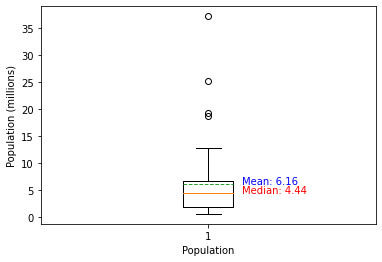

In [13]:
data = state['Population']/1_000_000
fig, ax = plt.subplots()
box = ax.boxplot(data, showmeans=True, meanline=True, vert=True)
ax.set_ylabel('Population (millions)')
ax.set_xlabel('Population')

# 计算 Mean 和 Median
mean_value = np.mean(data)
median_value = np.median(data)

# 标注平均值
plt.annotate(f'Mean: {mean_value:.2f}', xy=(1.1, mean_value), color='blue')

# 标注中位数
plt.annotate(f'Median: {median_value:.2f}', xy=(1.1, median_value), color='red')
plt.show()

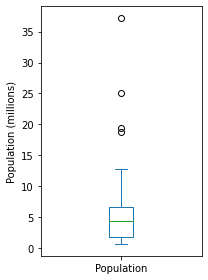

In [14]:
# 通常我们会更简单的绘制BoxPlot，不会添加标注
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()

数据分析：

1. **箱体（Box）**
- 箱体的上下边界代表 **第一四分位数(Q1)** 和 **第三四分位数(Q3)**，即将数据按大小分为四等分后，25% 和 75% 位置的数据值。
- 中间的橙色线是 **中位数(Median)**，即数据的中间值（图中标记为 4.44 百万人）。

2. **须线（Whiskers）**
- 箱体上下延申的线段（须线）表示数据的范围，但是不包括离群值（outliers）。
- 上下须线的末端分别代表 **最低非异常值** 和 **最高非异常值**。

3. **离群值（Outliers）**
- 离群值是那些显著高于或低于整体分布的数据点，用图中的小圆圈表示。
- 例如，图中有几个高值离群点，最大离群点接近 35 百万人。

4. **平均值（Mean）**
- 图中标注了虚线，表示数据的均值(Mean)，为 **6.16 百万人**。均值稍高于中位数，说明整体分布右偏，有极端高值拉高了平均值。

5. **总体分布特性**
- 数据的中位数 4.44 百万人靠近箱体的下方，表明数据集中分布在较低的范围。
- 数据的上侧尾巴较长，离群值较多，说明数据分布有一定的右偏（高值较多）。

## 习题3

编写下面的函数，读取`HOUSE_SALES_CSV`文件中的`SalePrice`列的数据（价格单位要换算成千美元），计算房屋价格的百分位数（Percentile）, 四分位距（IQR）, 计算箱线图中最低非异常值和最高非异常值，也就是箱线图的上下须线的位置，最后创建箱线图（不要绘制）并从函数中返回计算的值和创建的箱线图。

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: analyze_house_prices

import pandas as pd
import matplotlib.pyplot as plt

def analyze_house_prices(HOUSE_SALES_CSV):
    """
    读取CSV文件中的房屋售价数据计算统计值，并返回箱线图绘制所需信息。

    参数:
        HOUSE_SALES_CSV: CSV文件的路径。

    返回:
        dict: 包含计算的统计数据，包括百分位数、四分位距、上下须的位置等。
        matplotlib.figure.Figure: 绘制的箱线图对象。
    """
    ## 读取CSV文件中的数据
    # data =  ...

    ## 提取 SalePrice 列并转换为千元单位
    # sales_prices = ...

    ## 计算统计值q1, q3, iqr
    # q1 = ...
    # q3 = ...
    # iqr = ...

    # 计算最低非异常值和最高非异常值
    # lower_whisker = ...
    # higher_whisker = ...

    # 创建箱线图
    # fig, ax = plt.subplots()
    # ax.boxplot(...)

    # 大约9行代码
    ## 你编写的代码从这里开始


    ## 你编写的代码到这里结束

    # 读取CSV文件中的数据
    data = pd.read_csv(HOUSE_SALES_CSV)

    # 提取 SalePrice 列并转换为千元单位
    sale_prices = data['SalePrice'] / 1000

    # 计算统计值
    q1 = sale_prices.quantile(0.25)  # 第25百分位数
    q3 = sale_prices.quantile(0.75)  # 第75百分位数
    iqr = q3 - q1                    # 四分位距

    # 计算箱线图中的上下须（最低非异常值和最高非异常值）
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # 创建新的图形和轴对象
    fig, ax = plt.subplots()

    # 创建箱线图
    ax.boxplot(sale_prices)

    # 返回计算出的统计数据和箱线图对象
    return {
        "Q1 (25th Percentile)": q1,
        "Q3 (75th Percentile)": q3,
        "IQR": iqr,
        "Lower Whisker": lower_whisker,
        "Upper Whisker": upper_whisker
    }, ax

{'Q1 (25th Percentile)': 325.0, 'Q3 (75th Percentile)': 585.0, 'IQR': 260.0, 'Lower Whisker': -65.0, 'Upper Whisker': 975.0}


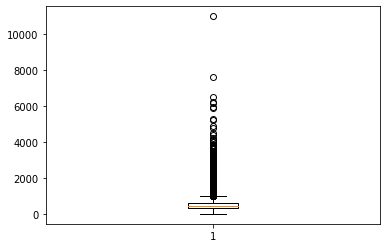

In [16]:
# 调用函数并显示箱线图
%matplotlib inline
result, ax = analyze_house_prices(HOUSE_SALES_CSV)
print(result)
# 输出结果应该为：
# {'Q1 (25th Percentile)': 325.0, 'Q3 (75th Percentile)': 585.0, 'IQR': 260.0,
#  'Lower Whisker': -65.0, 'Upper Whisker': 975.0}

In [17]:
# 测试你的函数
%matplotlib agg
from testset6 import test_analyze_house_prices
test_analyze_house_prices(analyze_house_prices)

恭喜你通过了习题3 test_analyze_house_prices 测试。3/3


## 置信区间(Confidence Intervals)

### 核心概念

总体比例的置信区间 (Confidence Intervals for Population Proportions)

-   **目标：** 根据样本 (sample) 估算具有某种特征的总体 (population) 的真实比例 (true proportion)（百分比）。可以想象成猜测*所有*总是使用汽车座椅的父母的百分比，但你只能询问一部分父母（样本）。

-   **置信区间 (Confidence Interval)：** 我们认为真实总体比例 (true population proportion) 可能落入其中的一个数值范围。 这不是保证，而是概率的陈述。

-   **关键术语 (Key Terms)**
    *   p：要检验的总体比例 (population proportion)。
    *   p̂ (p-hat)：（阳性回复的数量）/（样本数量）number of positive response / number of sample。
    *   误差范围 (Margin of error)：估计可能出现的偏差。
    *   标准误差 (Standard error)：抽样分布的标准差 (standard deviation of a sampling distribution)。

**如何计算比例的置信区间 (How to Calculate a Confidence Interval (for a Proportion)):**

1.  **最佳估计 (Best Estimate) (p̂):**
    *   这是你的样本比例 (sample proportion)。 计算公式为：$$p̂ = (样本中的“成功”数) / (总样本量)$$  $$p̂ = (Number of "successes" in the sample) / (Total sample size)$$
    *   在示例中，659 位家长中有 540 位表示总是使用汽车座椅。 因此，p̂ = 540/659 = 0.82（大约）。

2.  **误差范围 (Margin of Error):**
    *   这解释了使用样本来代表整个总体的不确定性。
    *   计算公式为：`误差范围 (Margin of Error) = (临界值 (Critical Value)) * (估计标准误差 (Estimated Standard Error))`

    *   **临界值 (Critical Value) (z-star):** 这取决于你期望的置信水平 (confidence level)。 对于 95% 的置信水平，临界值约为 1.96（或通常四舍五入为 2）。 该值来自标准正态分布 (standard normal distribution)（Z 分布）。 较高的置信水平需要较大的临界值。

    *   **估计标准误差 (Estimated Standard Error):** 这衡量了样本比例的变异性。 计算公式为：
        $$\sqrt ( [p̂ * (1 - p̂)] / n ) $$
        其中 'n' 是样本量 (sample size)。

3.  **置信区间计算 (Confidence Interval Calculation):**
    *   `置信区间 (Confidence Interval) = 最佳估计 (Best Estimate) ± 误差范围 (Margin of Error)`
    *   `置信区间 (Confidence Interval) = p̂ ± (临界值 (Critical Value) * 估计标准误差 (Estimated Standard Error))`

**示例演练（汽车座椅使用）(Example Walkthrough (Car Seat Usage)):**

1.  **总体 (Population)：** 有幼儿的父母。
2.  **感兴趣的参数 (Parameter of Interest) (p)：** *所有*有幼儿的父母总是使用汽车座椅的真实比例。
3.  **样本量 (Sample Size) (n)：** 659
4.  **“成功”数 ("Successes") (x)：** 540（表示“是”的父母）
5.  **最佳估计 (Best Estimate) (p̂)：** 540/659 ≈ 0.82
6.  **置信水平 (Confidence Level)：** 95%
7.  **临界值 (Critical Value) (z-star)：** 
    - 置信区间95%时，z-star=1.96
    - 置信区间99%时，z-star=2.576
    - 置信区间90%时，z-star=1.645
8.  **估计标准误差 (Estimated Standard Error)：** √( [0.82 * (1 - 0.82)] / 659 ) ≈ 0.0146
9.  **误差范围 (Margin of error):** 1.96 * 0.0146 ≈ 0.0286
10. **置信区间 (Confidence Interval)：** 0.82 ± 0.0286，得出范围 (0.7914, 0.8474)。 转换为百分比：79.14% 到 84.74%。

**解释 (Interpretation):**

*   简单的(但是不准确的)解释:“我们有 95% 的信心，总是使用汽车座椅的有幼儿父母的真实比例在 79.14% 到 84.74% 之间。”

*   **重要提示 (更准确的解释):** 这*并不*意味着真实比例*正好*在该范围内有 95% 的可能性。 应该是如果我们**多次重复**此抽样过程，我们计算出的 95% 的置信区间将包含真实总体比例。

<div align="center">  
    <img src="./img/2025-02-12-07-38-48.png" width="400" height="300">  
</div>  

**置信区间可视化的解释：**
- 网站链接： [Seeing Theory App](https://seeing-theory.brown.edu/frequentist-inference/index.html#section2) 
- 使用方法： 选择 “Start” --> "frequentist-inference" --> "Confidence Interval"


**主要收获 (Key Takeaways):**

*   置信区间 (Confidence intervals) 为总体比例 (population proportion) 提供了一系列合理的数值。
*   置信区间 (confidence interval) 的中心是样本比例 (sample proportion) (p̂)。
*   区间的宽度由误差范围 (margin of error) 决定，误差范围取决于置信水平 (confidence level) 和样本量 (sample size)。 较大的样本量会导致较窄的区间（更高的精度）。
*   置信区间 (confidence interval) 的解释至关重要。 这是关于该方法长期性能的陈述，而不是关于任何单个区间的保证。

### 使用Python计算置信区间

置信区间可以按以下方式计算：

$${\rm 最佳估计值} \pm {\rm 误差范围}$$

其中*最佳估计值*可以是
- 观察到的总体比例
- 观察到的均值

而*误差范围*是**临界值**乘以**标准误差**。

临界值是根据自由度和所需的置信水平计算的。对于样本量超过30个观测值且置信水平为95%的情况，我们可以使用z乘数1.96来代替临界值。z乘数的优点是不依赖于任何"自由度"。

创建95%置信区间的公式也可以表示为：

$${\rm 总体比例或均值} \pm ({\rm 临界值} \cdot {\rm 标准误差})$$

最后，总体比例和均值的标准误差计算方法不同：

$${\rm 比例的标准误差} = \sqrt{\frac{{\rm 总体比例} \cdot (1 - {\rm 总体比例})}{{\rm 观测数量}}}$$

$${\rm 均值的标准误差} = \frac{{\rm 标准差}}{\sqrt{{\rm 观测数量}}}$$


#### 案例1（总体比例）

我们有一个由659名有幼儿的人组成的样本，其中85%的父母始终使用儿童安全座椅。这个点估计值（85%）并不完全等于使用儿童安全座椅的父母的总体比例。标准误差（SE）表示点估计值相对于总体值可能存在的误差。接下来，我们将使用计算比例标准误差的程序来计算这个标准误差。

In [18]:
import numpy as np
import pandas as pd

# 临界值
tstar = 1.96

# 最佳估计值
p = .85

# 样本数
n = 659

# 比例的标准误差
se = np.sqrt((p * (1 - p))/n)
se

0.01390952774409444

标准误差是0.014，即1.4个百分点。因此，我们的点估计值（85%）可能与真实值相差约1.4个百分点。接下来，我们要为始终使用儿童安全座椅的幼儿父母的比例计算置信区间。置信区间由其"置信下限"（lcb）和"置信上限"（ucb）来定义。

In [19]:
lcb = p - tstar * se
ucb = p + tstar * se
(lcb, ucb)

(0.8227373256215749, 0.8772626743784251)

#### 案例2(平均值)

现在，让我们使用侧手翻数据集，为侧手翻平均距离计算置信区间:

In [20]:
df = pd.read_csv(CARTWHEEL_CSV)
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [21]:
# 计算均值，标准差和样本数
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)

# 计算均值的标准误差
tstar = 2.064   # 95%的置信区间, 因为样本数不到30，使用t分布的乘数更大
se = sd/np.sqrt(n)
se

3.0117104774529704

计算均值的置信区间

In [22]:
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

## 习题4

编写函数，读取肺部疾病研究数据集(LUNGDISEASE_CSV)中的数据PEFR (Peak Expiratory Flow Rate): 呼气峰流速, 这是一个衡量肺功能的指标, 单位通常是升/分钟(L/min), 数值范围从110到610不等。根据文件中给出的PEFR样本数据均值，计算95%（`t_star`为1.96）的置信区间。

要求函数最后返回：
- 'PEFR'序列的全部数据
- 均值的标准误差
- 置信区间的置信下限和置信上限

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: calculate_pefr_confidence_interval
def calculate_pefr_confidence_interval(LUNGDISEASE_CSV):

    ## 读取肺部疾病数据文件
    # df = ...

    ## 获取'PEFR'列的数据
    # pefr_values = ...

    # 计算样本的均值，标准差，样本数
    # mean = ...
    # sd = ...
    # n = ...

    # 计算均值的标准误差
    # se = ...

    # 设置临界值
    # t_star =  ...

    # 计算置信区间的置信下限和置信上限
    # lcb = ...
    # ucb = ...
    # 大约共9行代码

    ## 你编写的代码从这里开始



    ## 你编写的代码到这里结束

    df = pd.read_csv(LUNGDISEASE_CSV)
    pefr_values = df['PEFR']

    mean = df['PEFR'].mean()
    sd = df['PEFR'].std()
    t_star = 1.96
    se = sd / np.sqrt(len(df))
    lcb = mean - t_star * se
    ucb = mean + t_star * se
    return pefr_values, se, lcb, ucb

In [24]:
from testset6 import test_calculate_pefr_confidence_interval
test_calculate_pefr_confidence_interval(calculate_pefr_confidence_interval)

恭喜你通过了习题4 test_calculate_pefr_confidence_interval 测试。4/4


## 统计学假设检验与推理

### 假设检验

1. **零假设（Null Hypothesis）**
- **定义**：零假设是一个基线假设，通常认为两组之间没有差异，所有的观察结果都可以用“随机性”来解释。
  - 例如，“组A与组B之间没有区别”，“所有治疗组的效果是一样的”。
- **逻辑**：
  - 假设数据中的差异只是随机产生的，而非因为实验处理的不同所引起。
  - 通过数据分析，我们试图证明这种想法是错误的（即“推翻零假设”）。

2. **备择假设（Alternative Hypothesis）**
- **定义**：备择假设与零假设相对立，代表我们想要证明的假设。它通常表明实验处理产生了某种显著效果。
- **举例**：
  - **零假设**: “组A和组B的均值相等”；**备择假设**：组A和组B的均值不同。
  - **零假设**: “组A的结果小于或等于组B”；**备择假设**：组A的结果大于组B。
  - **零假设**: “B比A的结果增加不足X%”；**备择假设**：B比A增加了X%以上。
- **特点**：
  - 零假设和备择假设必须涵盖所有可能性（即它们是互补的）。
  - 根据零假设中的设定，决定使用哪种具体假设检验方法。

3. **假设检验的核心思想**：基于零假设的前提，检验数据中的差异是否极端到足以排除“随机性”的解释。如果可以排除，就接受备择假设，认为实验处理或分组差异导致了观察到的显著不同。这种方法在决策中非常重要，因为人类容易将随机产生的现象误认为是有意义的。因此，通过统计假设检验，我们能更科学地判断实验结果是否有显著性。

### 统计显著性

**1. 统计显著性（Statistical Significance）**
- **定义**：统计显著性是用来衡量实验结果是否超出了随机性所能解释的范围。如果实验结果超出了随机变化的可能性范围，就称为统计显著。
- **目的**：通过统计显著性判断实验结果是否足够“极端”，从而推翻零假设。

---

**2. 关键术语**
1. **p值（p-value）**：
   - **定义**：在零假设成立的前提下，得到像观察结果一样极端或更极端结果的概率。
   - **意义**：p值越小，说明观察结果越不可能是随机性造成的，从而越有可能推翻零假设。
   
2. **α值（Alpha）**：
   - **定义**：判断结果是否显著的概率阈值，通常设定为5%（0.05）或1%（0.01）。如果p值小于α值，则结果被认为是统计显著的。
   - **注意**：α值是人为设定的，并不能保证一定得出正确的结论。

3. **第一类错误（Type 1 Error）**：
   - **定义**：错误地认为一个不存在的效应是真实的（即误判随机性为显著性，假阳性）。
   
4. **第二类错误（Type 2 Error）**：
   - **定义**：错误地认为一个真实的效应是随机性造成的（即误判显著性为随机性，假阴性）。

---

**3. 案例解释**
**电商实验结果（A/B测试）**：
- **实验数据**：
  - 价格A：200次转化，23539次未转化。
  - 价格B：182次转化，22406次未转化。
- **转化率**：
  - 价格A的转化率为0.8425%（$200 / (23539 + 200)$）。
  - 价格B的转化率为0.8057%（$182 / (22406 + 182)$）。
  - 差异为0.0368个百分点。
- **问题**：
  - 尽管价格A的转化率比价格B高，但转化率本身较低（不到1%），实际的转化次数（成功样本数）只有几百次。因此，我们可以通过一些检验方法，例如**z检验或t检验**判断这一差异是否可能由随机性造成。

**4. 计算P值并解释结果**

使用Python软件计算得到P值（具体计算方法在下一小节）：$p \approx 0.6619$  

结果解释
- 由于p值（0.497）远大于显著性水平α = 0.05，我们无法拒绝零假设。
- 不拒绝零假设并不意味着接受零假设，这是一种保守的表述，存在不确定性，意思是当前的数据不足以推翻零假设。
- 价格A与价格B的转化率差异可能是由随机性造成的。



### t检验

接下来我们将学习假设检验的方法t-test，检验用户在网页A和网页B的会话时间是否存在显著差异。

1. **假设 (Hypotheses)**:
   - **零假设 ($H_0$)**: 用户在网页A和网页B的平均会话时间没有显著差异 ($\mu_1 - \mu_2 = 0$)。
   - **备择假设 ($H_a$)**: 用户在网页A和网页B的平均会话时间存在显著差异 ($\mu_1 - \mu_2 \neq 0$)。

2. **显著性水平 (Significance Level)**: 使用5%的显著性水平 ($\alpha = 0.05$)。

3. **t检验(t-test)的假设**

当样本量不大时，可以使用t检验，在使用 t 检验时，需要满足以下假设：
- 独立性：两个样本是相互独立的。
- 正态性：两个样本的分布接近正态分布。如果样本量较大（如 n > 30），根据中心极限定理，可以放宽正态性假设。

In [25]:
from scipy import stats

# 从CSV文件中读取网页会话时间顺序
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)

# 乘以100将时间单位转换为毫秒
session_times.Time = 100 * session_times.Time

# 打印数据
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


In [26]:
# 提取网页 A 和网页 B 的会话时间
time_a = session_times[session_times.Page == 'Page A'].Time
time_b = session_times[session_times.Page == 'Page B'].Time

# 计算网页A和网页B会话时间的均值以及均值差
mean_a = time_a.mean()
mean_b = time_b.mean()
print(mean_b - mean_a)

# 计算网页A和网页B会话时间的标准差的差值
sd_a = time_a.std()
sd_b = time_b.std()
print(sd_b - sd_a)

# 计算自由度
df = len(time_a) + len(time_b) - 2
print("自由度为：", df)

# 计算t值和p值
tstat, pvalue = stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time,
    session_times[session_times.Page == 'Page B'].Time,
    equal_var=True)  # equal_var=True 表示两组数据的方差没有区别

print(f'tstat: {tstat:.4f}')
print(f'p-value: {pvalue:.4f}')

# **结果的解释**
# 因为p值为0.2690，大于显著性水平0.05，所以无法拒绝零假设，
# 说明数据不足以证明网页A和网页B的会话时间均值有显著差异。

35.66666666666667
12.673225103998163
自由度为： 34
tstat: -1.1237
p-value: 0.2690


## 习题5

在下面的函数中，我们将要分析一项研究的数据`NAP_NO_NAP_CSV`，该研究考察了有小憩和无小憩习惯的幼儿在多个睡眠变量上的差异，假设检验，有小憩习惯（nap）的幼儿与无小憩习惯（no nap）的幼儿在24小时睡眠时长（列名为："24 h sleep duration"，以分钟计）上存在差异。

$$H_0: \mu_{nap}=\mu_{no\ nap}, \ H_a:\mu_{nap}\neq\mu_{no\ nap}$$

或者等价于:

$$H_0: \mu_{nap}-\mu_{no\ nap}=0, \ H_a:\mu_{nap}-\mu_{no\ nap} \neq 0$$

使用下面的条件可以过滤获取到有小憩习惯（nap）的幼儿与无小憩习惯（no nap）的幼儿数据：

- 有小憩习惯（no nap）的幼儿数据: `df['napping'] == 1`
- 无小憩习惯（no nap）的幼儿数据: `df['napping'] == 0`

在函数中使用t检验方法来检验是否要拒绝零假设，最后的函数要求返回下列数据：

- 有小憩习惯（nap）的幼儿与无小憩习惯（no nap）的幼儿在24小时睡眠时长均值的差
- 有小憩习惯（nap）的幼儿与无小憩习惯（no nap）的幼儿24小时睡眠时长均值的标准差的差值
- t检验自由度
- t_stat
- p值
- 布尔变量（`True`表示有显著差异，拒绝零假设；`False`表示没有显著差异，不拒绝零假设）

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: analyze_nap_sleep_duration
def analyze_nap_sleep_duration(NAP_NO_NAP_CSV, alpha=0.05):
    """
    分析有小憩/无小憩幼儿的24小时睡眠时长差异

    参数:
    data_path: 数据文件路径
    alpha: 显著性水平, 默认0.05

    返回:
    tuple: (均值差, 标准差的差, 自由度, t统计量, p值, 是否显著)
    """
    ## 读取数据
    # df = ...

    ## 过滤数据，过滤条件：
    ## - 有小憩习惯（no nap）的幼儿数据: `df['napping'] == 1`
    ## - 无小憩习惯（no nap）的幼儿数据: `df['napping'] == 0`
    # nap_sleep = ...
    # no_nap_sleep = ...

    ## 获取24小时睡眠时长数据, 列名为：'24 h sleep duration'
    # nap_sleep_24h = ...
    # no_nap_sleep_24h = ...

    ## 计算均值差
    # mean_diff = ...

    ## 计算标注差的差值
    # sd_diff = ...

    ## 使用函数stats.ttest_ind执行独立样本t检验，equal_var参数为True
    # t_stat, p_value = ...

    ## 计算自由度
    # n1, n2 = ...
    # df_tt = ...

    ## 判断是否显著
    # is_significant = ...

    ## 大约11行代码
    ## 你编写的代码从这里开始


    ## 你编写的代码到这里结束

    # 读取数据
    df = pd.read_csv(NAP_NO_NAP_CSV)

    # 分组获取24小时睡眠时长数据
    nap_sleep = df[df['napping'] == 1]['24 h sleep duration']
    no_nap_sleep = df[df['napping'] == 0]['24 h sleep duration']

    # 计算均值差
    mean_diff = nap_sleep.mean() - no_nap_sleep.mean()

    # 计算方差差
    sd_diff = nap_sleep.std() - no_nap_sleep.std()

    # 执行独立样本t检验
    t_stat, p_value = stats.ttest_ind(nap_sleep, no_nap_sleep, equal_var=True)

    # 计算自由度
    n1, n2 = len(nap_sleep), len(no_nap_sleep)
    df_tt = n1 + n2 -2

    # 判断是否显著
    is_significant = p_value < alpha

    return (mean_diff, sd_diff, df_tt, t_stat, p_value, is_significant)

In [28]:
analyze_nap_sleep_duration(NAP_NO_NAP_CSV)

(33.82533333333333,
 -16.00487687572963,
 18,
 1.4811248223284985,
 0.1558664953018476,
 False)

In [29]:
# 测试习题5
from testset6 import test_analyze_nap_sleep_duration
test_analyze_nap_sleep_duration(analyze_nap_sleep_duration)

恭喜你通过了习题5 test_analyze_nap_sleep_duration 测试。5/5


## 实验自动评分

运行下面的代码进行实验自动评分

In [30]:
from testset6 import grade_all_tests
grade_all_tests()

恭喜你通过了习题3 test_analyze_house_prices 测试。1/5
恭喜你通过了习题5 test_analyze_nap_sleep_duration 测试。2/5
恭喜你通过了习题4 test_calculate_pefr_confidence_interval 测试。3/5
恭喜你通过了习题2 test_calculate_z_scores 测试。4/5
恭喜你通过了习题1 test_get_columns_by_types 测试。5/5
恭喜你5/5 个测试
你的代码自动评分成绩(百分制)是:100.0


## 实验总结

请尽量使用自己的语言回答下面的问题。

问题一： 请在现实生活中找一个使用置信区间来评估的例子。你的例子使用的是总体比例还是均值，应该怎样去计算95%置信区间？其中95%到底意味着什么？

问题二： 请在现实生活中找一个可以使用假设检验和推理的例子。论述一下你的例子中零假设是什么，备择假设应该是什么，应该怎样去检验你的假设？应该如何解释你的假设结果？